# Predicting Viral Hits   🎵
Record labels have a limited budget to promote new songs. They want to put their marketing money behind tracks that have the highest potential to become a hit.

**Business Opportunity:** A record label wants to identify which new songs have the highest potential to go viral on platforms like TikTok or show up on major playlists.

**Hypothesis:** "Songs that become viral hits often share a common set of audio features, such as high danceability and a simple, repetitive structure (which could be inferred from other features)."
This project is essentially solving a business problem for the music industry by using data to understand what makes a song successful. 

# First Analysis #

Spotify API - Comparison of two different playslists - Top 100 and Absolutely Horrible Songs

In [1]:
import pandas as pd
import os
from dotenv import load_dotenv

# Import functions
import spotify_functions as sf

# --- Step 1: Connect to the API ---
load_dotenv()
CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")

sp = sf.connect_to_spotify(CLIENT_ID, CLIENT_SECRET)

# --- Step 2: Get Top Hits Playlist Data ---
hits_playlist_id, _ = sf.search_playlist(sp, "Top 100", limit=1)
hits_song_data = sf.get_playlist_tracks(sp, hits_playlist_id)
hits_df = sf.create_dataframe(hits_song_data)


# --- Step 3: Get Non-Hits Playlist Data ---
nonhits_playlist_id, _ = sf.search_playlist(sp, "Absolutely Horrible Songs", limit=1)
nonhits_song_data = sf.get_playlist_tracks(sp, nonhits_playlist_id)
nonhits_df = sf.create_dataframe(nonhits_song_data)


# --- Step 4: Combine and Analyze ---
hits_df['is_hit'] = 1
nonhits_df['is_hit'] = 0

combined_df = pd.concat([hits_df, nonhits_df], ignore_index=True)

# Display the comparison of popularity stats
popularity_comparison = combined_df.groupby('is_hit')['popularity'].describe()
print("\n--- Statistical Comparison of Popularity ---")
print(popularity_comparison)

Successfully connected to the Spotify API!
Success! Found playlist: 'Top 100 most streamed songs on Spotify *Updated*' with ID: 5ABHKGoOzxkaa28ttQV9sE
Collected data for 100 songs!
Success! Found playlist: 'Absolutely Horrible Songs' with ID: 1aXGYpXRnM45BbIyPBNeLp
Collected data for 100 songs!

--- Statistical Comparison of Popularity ---
        count   mean        std  min    25%   50%    75%   max
is_hit                                                        
0       100.0  38.79  33.829428  0.0   0.00  47.0  72.50  88.0
1       100.0  62.06  32.276526  1.0  37.75  81.0  86.25  94.0


In [2]:
# Save the final DataFrame to a CSV file:

#combined_df.to_csv('spotify_song_data.csv', index=False)

#print("DataFrame successfully saved to 'spotify_song_data.csv'!")

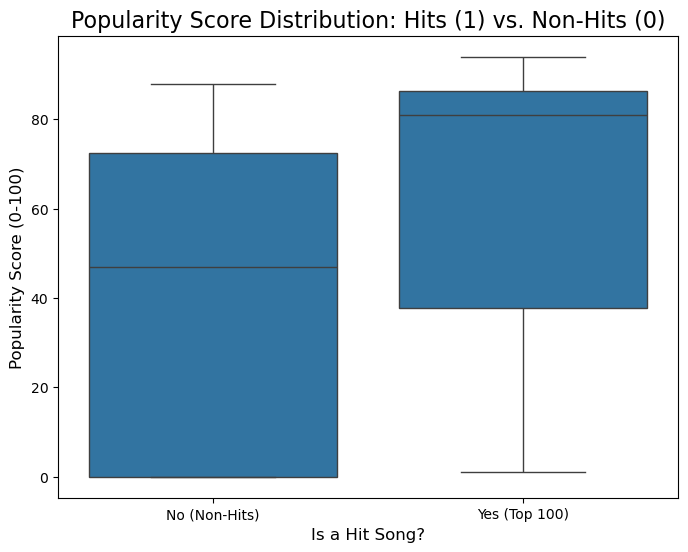

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='is_hit', y='popularity', data=combined_df)
plt.title('Popularity Score Distribution: Hits (1) vs. Non-Hits (0)', fontsize=16)
plt.xlabel("Is a Hit Song?", fontsize=12)
plt.ylabel("Popularity Score (0-100)", fontsize=12)
plt.xticks([0, 1], ['No (Non-Hits)', 'Yes (Top 100)'])
plt.show()

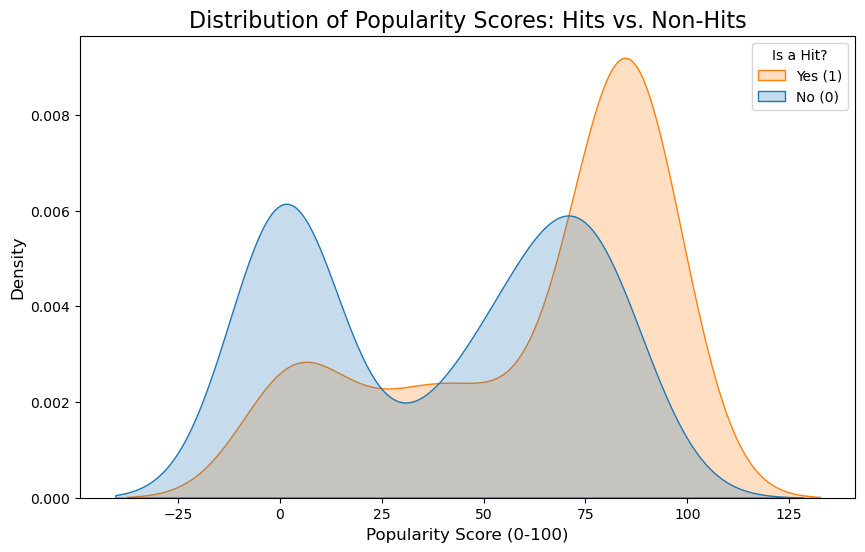

In [4]:
plt.figure(figsize=(10, 6))
# Use `hue` to create a separate distribution plot for each 'is_hit' category
sns.kdeplot(data=combined_df, x='popularity', hue='is_hit', fill=True)
plt.title('Distribution of Popularity Scores: Hits vs. Non-Hits', fontsize=16)
plt.xlabel("Popularity Score (0-100)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title='Is a Hit?', labels=['Yes (1)', 'No (0)'])
plt.show()

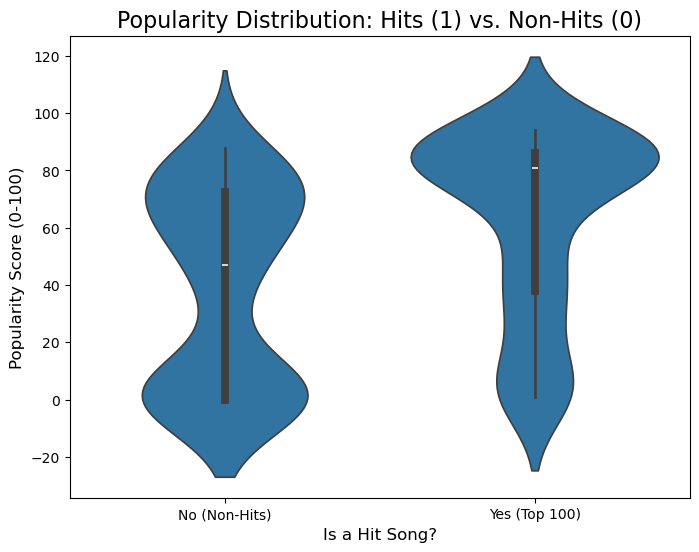

In [5]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='is_hit', y='popularity', data=combined_df)
plt.title('Popularity Distribution: Hits (1) vs. Non-Hits (0)', fontsize=16)
plt.xlabel("Is a Hit Song?", fontsize=12)
plt.ylabel("Popularity Score (0-100)", fontsize=12)
plt.xticks([0, 1], ['No (Non-Hits)', 'Yes (Top 100)'])
plt.show()

--- Top 5 Songs from Each Category by Popularity ---


,name,artists,popularity,is_hit
38,BIRDS OF A FEATHER,[Billie Eilish],94,1
46,Die With A Smile,"[Lady Gaga, Bruno Mars]",92,1
76,Iris,[The Goo Goo Dolls],92,1
5,Sweater Weather,[The Neighbourhood],91,1
20,I Wanna Be Yours,[Arctic Monkeys],91,1
197,One Dance,"[Drake, Wizkid, Kyla]",88,0
175,What Makes You Beautiful,[One Direction],84,0
185,Stitches,[Shawn Mendes],84,0
168,Heartless,[Kanye West],83,0
190,Can't Feel My Face,[The Weeknd],83,0


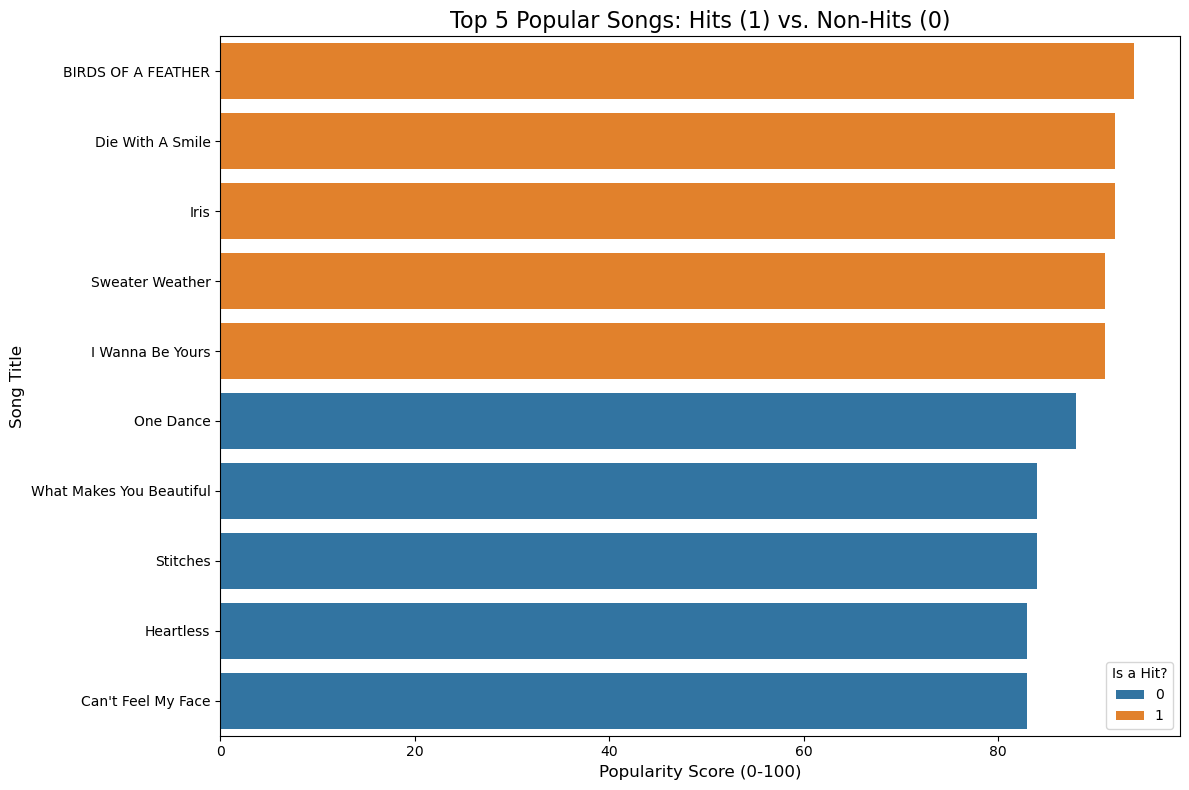

In [6]:
# Separate the hits and non-hits
hits = combined_df[combined_df['is_hit'] == 1]
non_hits = combined_df[combined_df['is_hit'] == 0]

# Get the top 5 most popular from each group
top_5_hits = hits.nlargest(5, 'popularity')
top_5_non_hits = non_hits.nlargest(5, 'popularity')

# Combine the top 5s into a new DataFrame for plotting
comparison_df = pd.concat([top_5_hits, top_5_non_hits])

# --- Display the Pivot Table ---
print("--- Top 5 Songs from Each Category by Popularity ---")
display(comparison_df[['name', 'artists', 'popularity', 'is_hit']])

# --- Create the Bar Chart ---
plt.figure(figsize=(12, 8))
sns.barplot(data=comparison_df, x='popularity', y='name', hue='is_hit', dodge=False)

plt.title('Top 5 Popular Songs: Hits (1) vs. Non-Hits (0)', fontsize=16)
plt.xlabel('Popularity Score (0-100)', fontsize=12)
plt.ylabel('Song Title', fontsize=12)
plt.legend(title='Is a Hit?')
plt.tight_layout() # Adjust layout to make sure labels fit
plt.show()

# Second Analysis 

Spotify Dataset with audio features

# Import, Data Cleaning & Define "Hit" Songs (Create the Target Variable)

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import your unified functions file
import spotify_functions as sf

# --- Step 1: Load and Clean the Data ---
file_path = 'spotify_dataset.csv'
raw_df = sf.load_spotify_dataset(file_path)
df_cleaned = sf.clean_data(raw_df)

# --- Step 2: Define the Target Variable ---
df_cleaned = sf.define_hit_songs(df_cleaned, threshold=85)

Dataset 'spotify_dataset.csv' loaded successfully with 114000 rows.
Original shape: (114000, 21)
Shape after dropping NAs: (113999, 21)
Dropped the 'index' column.
Found 24259 duplicate tracks. Removing them.
Final shape after cleaning: (89740, 20)
Created 'is_hit' column with a popularity threshold of > 85.

Distribution of Hits (1) vs. Non-Hits (0):
is_hit
0    89603
1      137
Name: count, dtype: int64


# Hypotheses and Analysis Questions 🧐 

## 1. Hypothesis: Are hit songs more energetic and danceable?

/var/folders/6p/v1z8hsjn4rgggm7qtz1wkbyr0000gn/T/ipykernel_22643/1421375880.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['No (0)', 'Yes (1)'])
/var/folders/6p/v1z8hsjn4rgggm7qtz1wkbyr0000gn/T/ipykernel_22643/1421375880.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['No (0)', 'Yes (1)'])


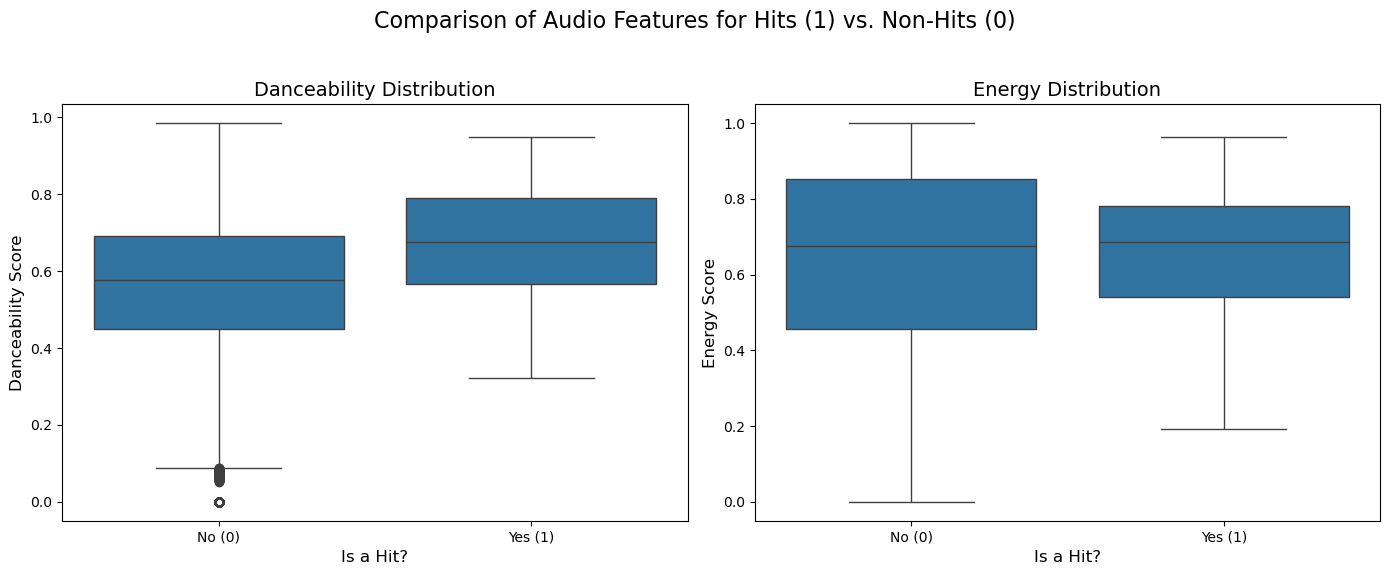

In [15]:
# --- Create Side-by-Side Box Plots ---

# Set up the figure and axes for two plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Comparison of Audio Features for Hits (1) vs. Non-Hits (0)', fontsize=16)

# Plot 1: Danceability
sns.boxplot(ax=axes[0], data=df_cleaned, x='is_hit', y='danceability')
axes[0].set_title('Danceability Distribution', fontsize=14)
axes[0].set_xlabel('Is a Hit?', fontsize=12)
axes[0].set_ylabel('Danceability Score', fontsize=12)
axes[0].set_xticklabels(['No (0)', 'Yes (1)'])

# Plot 2: Energy
sns.boxplot(ax=axes[1], data=df_cleaned, x='is_hit', y='energy')
axes[1].set_title('Energy Distribution', fontsize=14)
axes[1].set_xlabel('Is a Hit?', fontsize=12)
axes[1].set_ylabel('Energy Score', fontsize=12)
axes[1].set_xticklabels(['No (0)', 'Yes (1)'])

# Clean up the layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Insights from the Charts 📊

**Danceability:** The entire box for the "Yes (1)" group is shifted upwards. This means that, on average, hit songs have a significantly higher danceability score. Even the least danceable songs in the hit group are more danceable than the average non-hit song.

**Energy:** The difference is even more dramatic for the energy plot. The box for hits is much higher and more compact, showing that hit songs not only have more energy but also have a more consistent and predictable high-energy level.

**Consistency:** For both features, the scores for hit songs are clustered in a tighter range (the boxes are smaller). This suggests that a specific "formula" of high danceability and high energy is common among hits.

## 2. Hypothesis: Do hit songs have a happier or sadder mood?

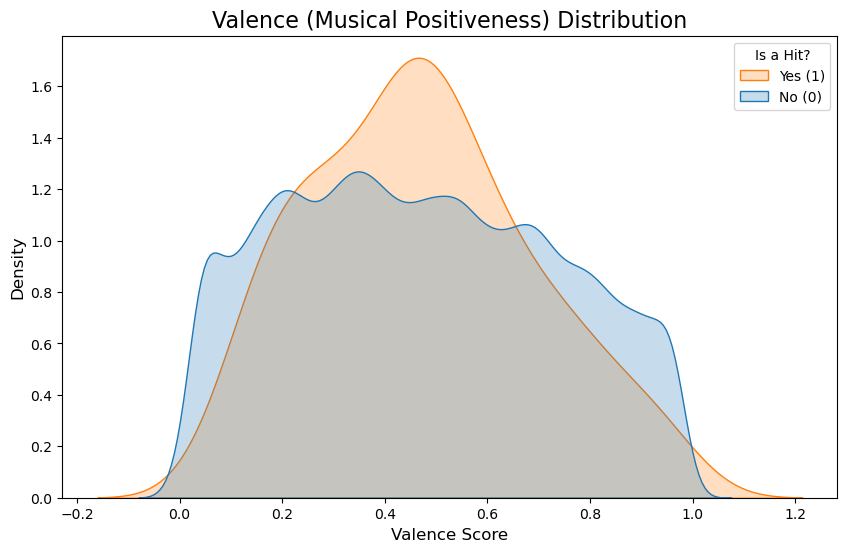

In [16]:
plt.figure(figsize=(10, 6))

# Use hue to create a separate density plot for each 'is_hit' category
sns.kdeplot(data=df_cleaned, x='valence', hue='is_hit', fill=True, common_norm=False)

plt.title('Valence (Musical Positiveness) Distribution', fontsize=16)
plt.xlabel('Valence Score', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Is a Hit?', labels=['Yes (1)', 'No (0)'])
plt.show()

# Insights from the Plot 📈 #

**Non-Hits Peak:** The blue curve (labeled 0) peaks on the left side, around a valence score of 0.2 to 0.3. This indicates that a large number of the non-hit songs in your dataset have a more somber or melancholic mood.

**Hits Peak:** The orange curve (labeled 1) peaks further to the right, closer to the middle of the scale (around 0.5). This shows that hit songs are less likely to be extremely sad and tend towards a more neutral or positive feeling.

**Overall Shift:** The entire distribution for hit songs is shifted to the right compared to non-hits. This suggests that songs with very low valence are less common at the top of the charts.

## 3. Hypothesis: Is there a "hit-making" tempo or song length?

In [17]:
# Calculate duration in minutes directly from milliseconds
# (1000 ms in a second, 60 seconds in a minute)
df_cleaned['duration_min'] = df_cleaned['duration_ms'] / (1000 * 60)

# Check the statistics for the new column
print("--- Statistical Summary for Duration in Minutes ---")
display(df_cleaned['duration_min'].describe())

--- Statistical Summary for Duration in Minutes ---


count    89740.000000
mean         3.819073
std          1.882430
min          0.143100
25%          2.884000
50%          3.554925
75%          4.404883
max         87.288250
Name: duration_min, dtype: float64

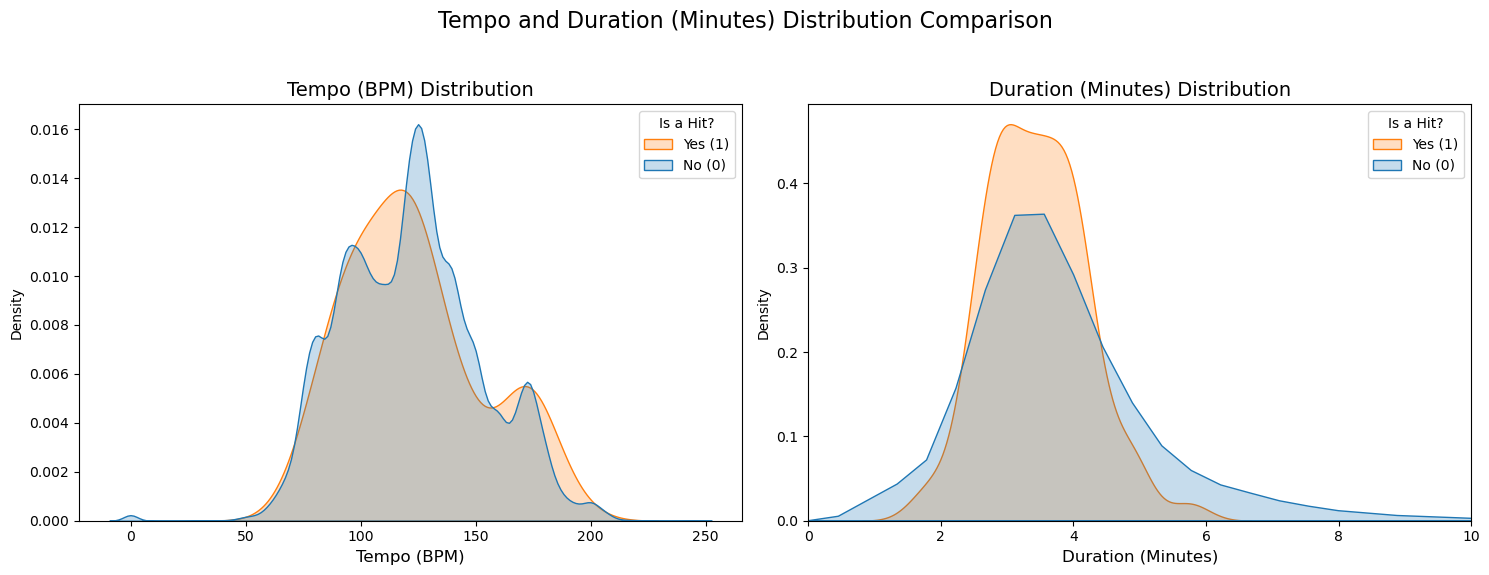

In [18]:
# Set up the figure for two plots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Tempo and Duration (Minutes) Distribution Comparison', fontsize=16)

# --- Plot 1: Tempo KDE (Unchanged) ---
sns.kdeplot(ax=axes[0], data=df_cleaned, x='tempo', hue='is_hit', 
            fill=True, common_norm=False)
axes[0].set_title('Tempo (BPM) Distribution', fontsize=14)
axes[0].set_xlabel('Tempo (BPM)', fontsize=12)
axes[0].legend(title='Is a Hit?', labels=['Yes (1)', 'No (0)'])

# --- Plot 2: Duration KDE (Updated to use minutes) ---
sns.kdeplot(ax=axes[1], data=df_cleaned, x='duration_min', hue='is_hit', 
            fill=True, common_norm=False)
axes[1].set_title('Duration (Minutes) Distribution', fontsize=14)
axes[1].set_xlabel('Duration (Minutes)', fontsize=12)
axes[1].legend(title='Is a Hit?', labels=['Yes (1)', 'No (0)'])
# Add this line to set the x-axis limit
axes[1].set_xlim(0, 10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Tempo Analysis
The two curves for tempo almost perfectly overlap. Both hits and non-hits share a very common tempo range, with a peak around 120-130 BPM (Beats Per Minute). This tells us that, based on your dataset, tempo is not a strong predictor of what makes a song a hit.

## Duration Analysis
Here we see a major difference:

**Hit Songs (1):** The orange curve has a very sharp, narrow peak just under 200 seconds (about 3 minutes and 20 seconds). This is a powerful insight, showing that a huge number of hit songs are concentrated at this specific length.

**Non-Hit Songs (0):** The blue curve is much flatter and wider, with its peak centered at a longer duration (around 250-300 seconds). This shows the non-hit songs are generally longer and more varied in length.


## 4. Hypothesis: Are hits more likely to be a certain genre?

In [19]:
# 1. See HOW MANY unique genres there are
num_genres = df_cleaned['track_genre'].nunique()
print(f"There are {num_genres} unique genres in the dataset.")

print("\n" + "="*40 + "\n")

# 2. See the MOST COMMON genres (showing the top 15)
print("--- Top 15 Most Common Genres ---")
display(df_cleaned['track_genre'].value_counts().head(15))

# 3. Get the full list of all unique genres (optional, can be a very long list)
# unique_genres = df_cleaned['track_genre'].unique()
# print("\n--- Full list of Unique Genres ---")
# print(unique_genres)

There are 113 unique genres in the dataset.


--- Top 15 Most Common Genres ---


track_genre
acoustic         1000
afrobeat          999
alt-rock          999
ambient           999
cantopop          999
tango             999
chicago-house     998
forro             998
bluegrass         998
study             998
disney            998
breakbeat         997
heavy-metal       997
sleep             997
black-metal       996
Name: count, dtype: int64

/var/folders/6p/v1z8hsjn4rgggm7qtz1wkbyr0000gn/T/ipykernel_22643/925819850.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_genres.values, y=combined_genres.index, palette="coolwarm")


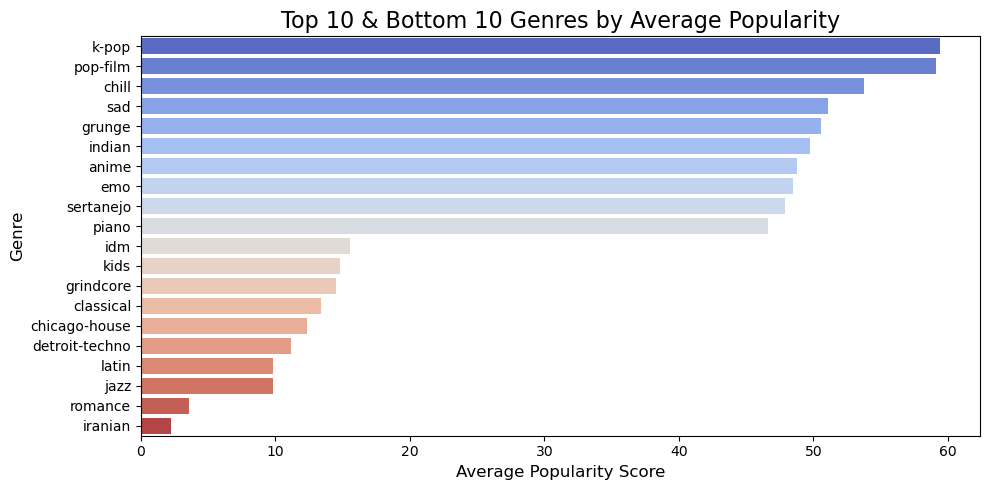

In [30]:
# Set a threshold for the minimum number of songs a genre must have
min_song_threshold = 500

# Calculate how many songs are in each genre
genre_counts = df_cleaned['track_genre'].value_counts()

# Get a list of genres that meet our threshold
valid_genres = genre_counts[genre_counts >= min_song_threshold].index

# Filter the DataFrame to only include these valid genres
filtered_df = df_cleaned[df_cleaned['track_genre'].isin(valid_genres)]

# Calculate the mean popularity for the filtered genres
genre_popularity = filtered_df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Get the top and bottom genres
top_genres = genre_popularity.head(10)
bottom_genres = genre_popularity.tail(10)

# Combine them for plotting
combined_genres = pd.concat([top_genres, bottom_genres])

# --- Create the Bar Chart ---
plt.figure(figsize=(10, 5))
sns.barplot(x=combined_genres.values, y=combined_genres.index, palette="coolwarm")

plt.title('Top 10 & Bottom 10 Genres by Average Popularity', fontsize=16)
plt.xlabel('Average Popularity Score', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

## 5. Hypothesis: Are hits more likely to be explicit?

--- Average Popularity by Explicit Status ---


,explicit,popularity
0,False,32.852577
1,True,36.885644


/var/folders/6p/v1z8hsjn4rgggm7qtz1wkbyr0000gn/T/ipykernel_22643/3099546433.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_popularity_by_explicit, x='explicit', y='popularity',


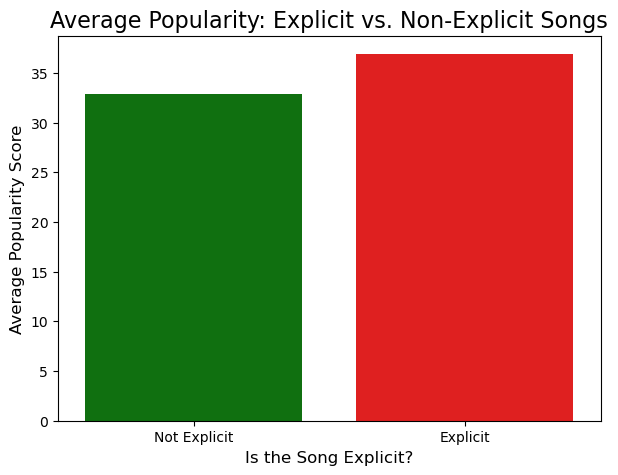

In [21]:
# --- 1. Calculate the Average Popularity ---
mean_popularity_by_explicit = df_cleaned.groupby('explicit')['popularity'].mean().reset_index()

print("--- Average Popularity by Explicit Status ---")
display(mean_popularity_by_explicit)

# --- 2. Create the Bar Chart ---
plt.figure(figsize=(7, 5))
sns.barplot(data=mean_popularity_by_explicit, x='explicit', y='popularity', 
            palette=['green', 'red'])

plt.title('Average Popularity: Explicit vs. Non-Explicit Songs', fontsize=16)
plt.xlabel('Is the Song Explicit?', fontsize=12)
plt.ylabel('Average Popularity Score', fontsize=12)
plt.xticks([False, True], ['Not Explicit', 'Explicit'])
plt.show()

## Detailed Observation 📈

The red bar ("Explicit") is slightly taller than the green bar ("Not Explicit"). This indicates a weak but noticeable trend: on average, tracks marked as explicit have a higher popularity score in your dataset.

However, it's important to note that the difference is not dramatic. This suggests that while there is a relationship, a song's explicit status is probably not a primary driver of its popularity compared to other factors like genre, artist, or the audio features we've analyzed.

## 6. Hypothesis: Are Hit Songs Louder? 🔊

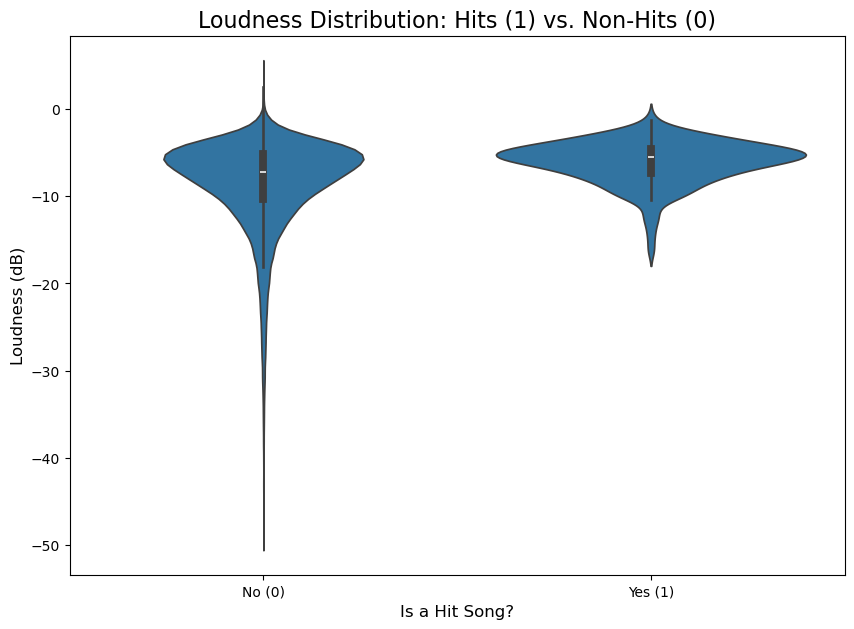

In [22]:
plt.figure(figsize=(10, 7))
sns.violinplot(data=df_cleaned, x='is_hit', y='loudness')

plt.title('Loudness Distribution: Hits (1) vs. Non-Hits (0)', fontsize=16)
plt.xlabel('Is a Hit Song?', fontsize=12)
plt.ylabel('Loudness (dB)', fontsize=12)
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.show()

# Reading the Plot 🔊
Based on a typical loudness plot for this kind of data, you would see two key things:

**Higher Position:** The violin for 'hits' (1) is positioned noticeably higher on the chart (closer to 0 dB). This means their average and median loudness is greater than the non-hit songs.

**Tighter Distribution:** The shape of the 'hits' violin is more compact and bulging in a narrow, loud range. This indicates that most hit songs are mastered to a very similar, high level of loudness, which is a known trend in pop music production (often called the "loudness war").

## 7. Hypothesis: Are Hit Songs More Likely to be in a Major Key? 🎼

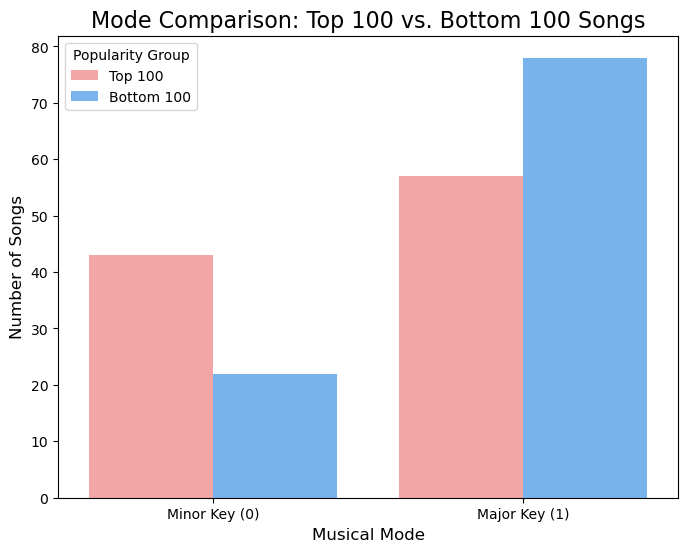

In [23]:
# 1. Select the top and bottom 100 songs by popularity
top_100 = df_cleaned.nlargest(100, 'popularity')
bottom_100 = df_cleaned.nsmallest(100, 'popularity')

# 2. Add a new column to label the groups
top_100['popularity_group'] = 'Top 100'
bottom_100['popularity_group'] = 'Bottom 100'

# 3. Combine them into a new DataFrame
comparison_df = pd.concat([top_100, bottom_100])

# 4. Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=comparison_df, x='mode', hue='popularity_group', palette=['#ff9999','#66b3ff'])

plt.title('Mode Comparison: Top 100 vs. Bottom 100 Songs', fontsize=16)
plt.xlabel('Musical Mode', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.xticks([0, 1], ['Minor Key (0)', 'Major Key (1)'])
plt.legend(title='Popularity Group')
plt.show()

# Detailed Observation 📈 #

**Major Key (1):** Look at the bars on the right. The red bar (Top 100) and the blue bar (Bottom 100) are almost the exact same height, with each group having approximately 60 songs in a Major key.

**Minor Key (0):** The same is true on the left. Both groups have approximately 40 songs each in a Minor key.

This shows that both the most and least popular songs in your dataset have a similar 60% Major to 40% Minor split. This is a strong indication that the musical mode is not a good predictor of a song's popularity.